* __Problem Statement__: The time within the food get delivered is a very important factor for a food delivery platform. This time taken is also responsible for popularity of a food delivery platform. If the delivery time of food is high then this could be a big issue for these platform, this could also led to loss of customers.
* __Aim__: Aim is to based on physical factors(location, weather, vehicle, traffic...) of the surroundings predict the time in which the food gets delivered.

In [3]:
# loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the csv file to pandas DataFrame
data = pd.read_csv('data/finalTrain.csv')
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


This data is from some food delivery platform which has features like age of delivery person, locations, traffic, weather conditions, vehicle condition, vehicle type, city ...

In [5]:
# Checking the shape of data
data.shape

(45584, 20)

In [6]:
# more information about shape and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

So we have 19 features and 45584 rows

### Handling Missing values

In [12]:
# columns with missing values
missings = data.isna().sum()
missings[missings > 0]

Delivery_person_Age        1854
Delivery_person_Ratings    1908
Time_Orderd                1731
Weather_conditions          616
Road_traffic_density        601
multiple_deliveries         993
Festival                    228
City                       1200
dtype: int64

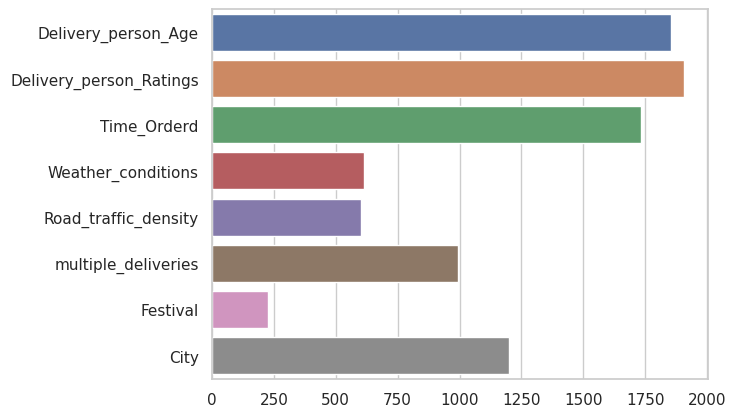

In [23]:
# selecting only columns with missing values more than 0
_ = missings[missings > 0]
sns.set_theme(style = 'whitegrid')
sns.barplot(x = _.values, y = _.index)
# plt.xticks(rotation = 90)
plt.show()